In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.dropna(inplace = True)  # Remove all missing value

In [4]:
df.shape

(714, 3)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train.shape

(571, 2)

In [9]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [10]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6153846153846154

In [11]:
X_test.head()

,Age,Fare
149,42.0,13.00
407,3.0,18.75
53,29.0,26.00
369,24.0,69.30
818,43.0,6.45


In [12]:
np.mean(cross_val_score(clf, X,y))

np.float64(0.6260514133753571)

## Discretization(Binning)

In [26]:
kbin_age = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')

In [27]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [28]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [29]:
X_train_trf

array([[5., 5.],
       [4., 4.],
       [5., 5.],
       ...,
       [7., 9.],
       [6., 5.],
       [6., 2.]])

In [30]:
X_test_trf

array([[8., 4.],
       [0., 5.],
       [5., 6.],
       [3., 8.],
       [8., 0.],
       [0., 7.],
       [6., 5.],
       [9., 5.],
       [4., 2.],
       [3., 2.],
       [1., 8.],
       [6., 4.],
       [5., 8.],
       [7., 2.],
       [6., 9.],
       [3., 3.],
       [3., 0.],
       [1., 8.],
       [4., 4.],
       [9., 8.],
       [1., 7.],
       [9., 6.],
       [0., 4.],
       [6., 9.],
       [3., 3.],
       [1., 2.],
       [1., 3.],
       [4., 5.],
       [1., 4.],
       [7., 2.],
       [2., 3.],
       [0., 7.],
       [7., 6.],
       [6., 0.],
       [7., 2.],
       [7., 5.],
       [6., 6.],
       [9., 7.],
       [9., 7.],
       [9., 1.],
       [0., 5.],
       [2., 2.],
       [7., 9.],
       [9., 4.],
       [9., 8.],
       [5., 3.],
       [6., 7.],
       [2., 7.],
       [7., 0.],
       [8., 7.],
       [7., 8.],
       [3., 4.],
       [4., 8.],
       [4., 5.],
       [4., 0.],
       [9., 3.],
       [4., 7.],
       [0., 7.],
       [4., 1.

In [31]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [32]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [33]:
trf.named_transformers_['first'].encode

'ordinal'

In [34]:
trf.named_transformers_['first'].n_bins

10

In [35]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [37]:
output = pd.DataFrame({
    'Age' : X_train['Age'],
    'Age_trf' : X_train_trf[:, 0],
    'Fare' : X_train['Fare'],
    'Fare_trf' : X_train_trf[:, 1]
})

In [38]:
output

,Age,Age_trf,Fare,Fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [39]:
output['age_labels'] = pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [41]:
output.sample(5)

,Age,Age_trf,Fare,Fare_trf,age_labels,fare_labels
747,30.0,5.0,13.0000,4.0,"(28.5, 32.0]","(9.225, 13.0]"
785,25.0,4.0,7.2500,0.0,"(22.0, 25.0]","(0.0, 7.75]"
399,28.0,4.0,12.6500,3.0,"(25.0, 28.5]","(9.225, 13.0]"
287,22.0,3.0,7.8958,2.0,"(19.0, 22.0]","(7.75, 7.896]"
131,20.0,2.0,7.0500,0.0,"(19.0, 22.0]","(0.0, 7.75]"


In [45]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred = clf.predict(X_test_trf)

accuracy_score(y_pred, y_test)

0.6223776223776224

In [47]:
X_trf = trf.fit_transform(X)

np.mean(cross_val_score(clf,X_trf, y))

np.float64(0.6624642962671131)

In [69]:
def discretization(bins, strategy):
    kbins_age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    kbins_fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)

    trf = make_column_transformer(
        (kbins_age,['Age']),
        (kbins_fare,['Fare']),
        remainder = 'passthrough'
    )
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y)))

    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:, 0], color = 'red')
    plt.title('After')


    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:, 1], color = 'red')
    plt.title('After')
    
    plt.show()

0.6190584063823501


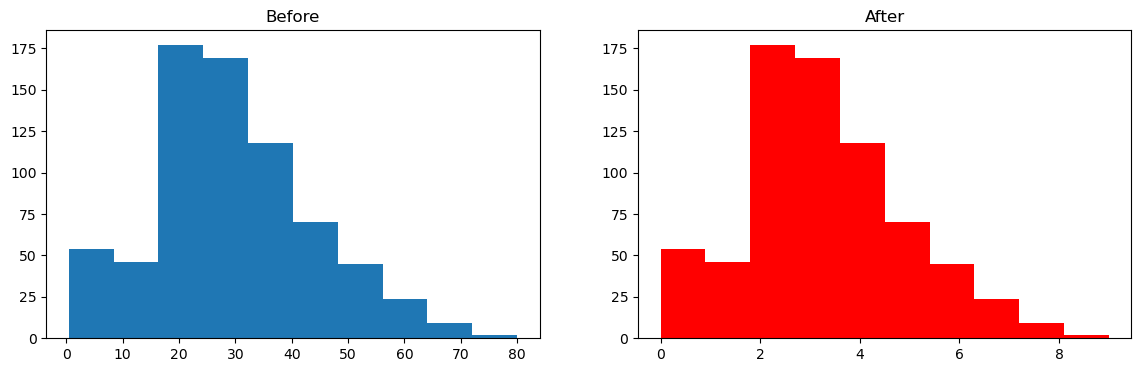

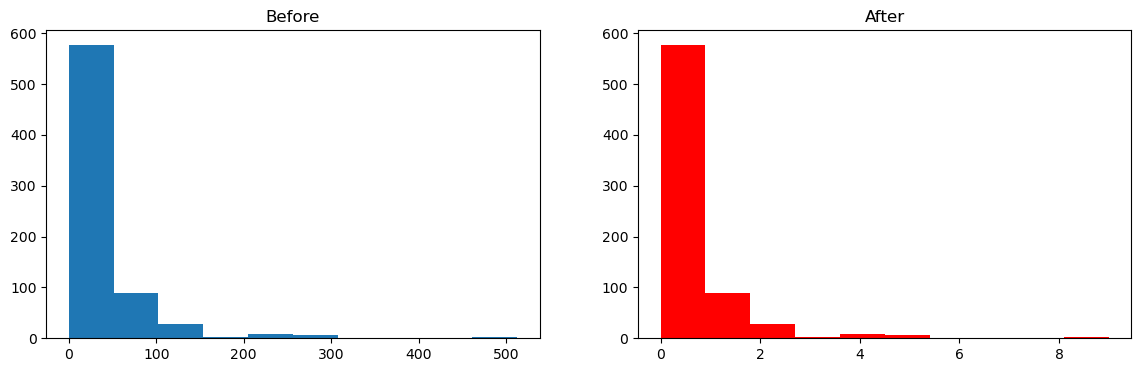

In [74]:
discretization(10, 'uniform')

# Bizarization

In [ ]:
from sklearn.preprocessing import Binarizer